Loading Dataset

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,AveragePooling2D
from keras.regularizers import L2
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, CSVLogger
np.set_printoptions(suppress=True)

Reading and preparing dataset

In [11]:
categories = ["buildings", "forest", "glacier", "mountain", "sea", "street"]


def load_data(path, flip=False, flipCounter=0):
    %cd $path
    X, Y = [], []
    i = 0
    for category in categories:
        label = categories.index(category)
        for fileName in os.listdir(category):
            image = cv2.resize(cv2.imread(os.path.join(
                category, fileName)), (150, 150))/255
            img32 = np.float32(image)
            image = cv2.cvtColor(img32, cv2.COLOR_BGR2RGB)
            del img32
            X.append(np.array(image, dtype=np.float16))
            Y.append(label)
            if flip and i <= flipCounter:
                X.append(np.array(cv2.flip(image, 1), dtype=np.float16))
                Y.append(label)
                i = i + 1

    dataset = list(zip(X, Y))
    random.shuffle(dataset)
    X, Y = zip(*dataset)

    X = np.array(X)
    Y = np_utils.to_categorical(np.array(Y, dtype=np.float16), 6)
    
    %cd ../../..
    return X, Y


def load_prediction_data(path):
    %cd $path
    X = []
    for fileName in os.listdir():
        image = cv2.resize(cv2.imread(fileName), (150, 150))/255
        image = cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2RGB)
        X.append(np.array(image, dtype=np.float16))

    X = np.array(X)
    %cd ../../..
    return X


Builing training and testing arrays

In [3]:
X_test, Y_test = load_data('./Dataset/seg_test/seg_test', False, 0)
X_pred = load_prediction_data('./Dataset/seg_pred/seg_pred')


c:\Users\Raed Sbenaty\Desktop\ITE 4th Year\Neural Networks\IIC\Dataset\seg_pred\seg_pred
c:\Users\Raed Sbenaty\Desktop\ITE 4th Year\Neural Networks\IIC


Testing training data

In [4]:
def show_random_image(X, Y=None):
    l = len(X)
    ran = np.random.randint(0, l)
    plt.imshow((X[ran]*255).astype(np.int))
    if Y is not None:
        index = np.argmax(Y[ran], axis=None, out=None)
        plt.xlabel(categories[index])
    plt.show
    return ran


Model architecture

In [6]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(5, 5),
          input_shape=(150,150,3), activation="relu"))
model.add(Conv2D(25, kernel_size=(3, 3), activation="relu"))
model.add(Dropout(0.4))
model.add(AveragePooling2D(pool_size=(3, 3)))

model.add(Conv2D(25, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(25, kernel_size=(3, 3), activation="relu"))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(12, (3, 3), activation="relu"))
model.add(Conv2D(12, (3, 3), activation="relu"))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(64, activation="leaky_relu"))
model.add(Dropout(0.3))

model.add(Dense(32, activation="leaky_relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation="softmax", activity_regularizer=L2(0.02)))


In [7]:
model.load_weights('model.h5')
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

buildings : 0.99996734
forest : 2.7295633e-13
glacier : 2.2234314e-10
mountain : 1.5690723e-12
sea : 6.2737526e-10
street : 3.2623928e-05


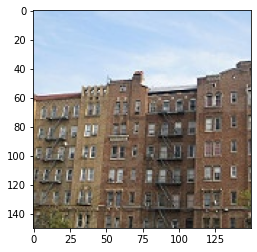

In [13]:
index = show_random_image(X_pred)
result = np.squeeze(model.predict(np.array([X_pred[index]])))
for category, prop in zip(categories, result):
    print(category, ':', prop)
